# Loading/Manipulating excel data with Pandas

### Emergence data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

data_loc = '../data/sampling_details.xlsx'

release_date = pd.Timestamp('2005-03-12')

# load the sentinel fields sheet
sentinel_fields_data = pd.read_excel(data_loc,sheetname='Kal-sentinels-raw')
# rename the headings with spaces in them
sentinel_fields_data.rename(columns={"Field descrip":"descrip","date emerged":"date", 
                                     "Field ID (jpgs)": "id",
                                     "Field ID (paper)":"paperid"}, inplace=True)
sentinel_fields_data.drop('descrip',1,inplace=True)
sentinel_fields_data.drop('paperid',1,inplace=True)
sentinel_fields_data.sort_values(['id','date'], inplace=True)
# get sum of all the emergences
col_list = list(sentinel_fields_data)
for name in ['id','date']:
    col_list.remove(name)
sentinel_fields_data['All_total'] = sentinel_fields_data[col_list].sum(axis=1)
# get the number of E Hayati emergences per day
sentinel_fields_data['E_total'] = sentinel_fields_data[['Efemales','Emales']].sum(axis=1)
sentinel_fields_data['datePR'] = sentinel_fields_data['date'] - release_date
#print(sentinel_fields_data['datePR'].min().days)
#day29 = pd.Timedelta('29 days')
#sentinel_fields_data[sentinel_fields_data['datePR']==day29]['E_total'].values
#PR29 = sentinel_fields_data['datePR'] == day29
#sentinel_fields_data[PR29]
#sentinel_fields_data
#sentinel_fields_data[sentinel_fields_data['E_total']>0].plot.scatter(x='Wfnum',y='E_total')

In [2]:
release_field_data = pd.read_excel(data_loc,sheetname='Kal-releasefield-raw')
# in our data, North was on the left of the grid. So switch coordinates
release_field_data['temp'] = release_field_data['xcoord']
release_field_data['xcoord'] = release_field_data['ycoord']
release_field_data['ycoord'] = -release_field_data['temp'] # need to flip orientation
release_field_data.drop('temp',1,inplace=True)
# put release point at the origin
release_field_data['ycoord'] += 300
release_field_data['xcoord'] -= 200
col_list = list(release_field_data)
for name in ['Field','xcoord','ycoord','date emerged']:
    col_list.remove(name)
release_field_data['All_total'] = release_field_data[col_list].sum(axis=1)
release_field_data['E_total'] = release_field_data[['Efemales','Emales']].sum(axis=1)
release_field_data['datePR'] = release_field_data['date emerged'] - release_date
release_field_data.drop('Field',1,inplace=True)
#release_field_data['ycoord'].values
release_field_data.sort_values(['datePR','xcoord','ycoord'],inplace=True)
print(release_field_data['datePR'].map(lambda t: t.days).unique())
#release_field_data

[19 21 23 25 27 29 32 34 36 38]


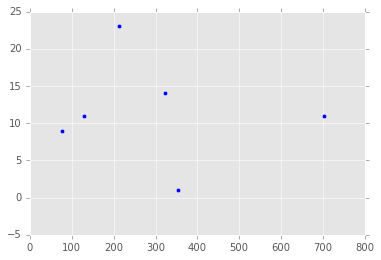

In [28]:
field_totals = []
E_totals = []
for field in sentinel_fields_data['id'].unique():
    field_totals.append(sentinel_fields_data[sentinel_fields_data['id']==field]['Wfnum'].sum(axis=0))
    E_totals.append(sentinel_fields_data[sentinel_fields_data['id']==field]['E_total'].sum(axis=0))
plt.scatter(field_totals,E_totals)
plt.show()

### Observation data

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_loc = '../data/adult_counts_kalbar.xlsx'

release_date = pd.Timestamp('2005-03-12')

# load the grid adult counts sheet
grid_data = pd.read_excel(data_loc,sheetname='adult counts field A')
# rename the headings with spaces in them
grid_data.rename(columns={"x coor":"x","y coor":"y", 
                                     "num leaves viewed": "leaves",
                                     "num hayati":"hayati"}, inplace=True)
# we don't really care about the leaf num columns
grid_data = grid_data[['date','collector','x','y','leaves','hayati']]
# in our data, North was on the left of the grid. So switch coordinates
grid_data['xcoord'] = grid_data['y']
grid_data['ycoord'] = -grid_data['x'] # need to flip orientation
grid_data.drop(['x','y'],1,inplace=True)
# put release point at the origin
grid_data['ycoord'] += 300
grid_data['xcoord'] -= 200
# convert date to datePR
grid_data['datePR'] = grid_data['date'] - release_date
grid_data.sort_values(['datePR','xcoord','ycoord'],inplace=True)
grid_data

,date,collector,leaves,hayati,xcoord,ycoord,datePR
34,2005-03-15,marc,90,1,-200,200,0 days
32,2005-03-15,nancy,270,1,-50,100,0 days
33,2005-03-15,psj,270,1,0,50,0 days
31,2005-03-15,nancy,270,2,0,100,0 days
30,2005-03-15,nancy,90,1,150,100,0 days
20,2005-03-18,nancy,270,1,-200,300,3 days
18,2005-03-18,mcsk,90,1,-150,-50,3 days
21,2005-03-18,nancy,270,1,-150,300,3 days
19,2005-03-18,paul,270,1,-50,-50,3 days
25,2005-03-18,paul,90,2,-50,50,3 days
